In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load local dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Separate features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Get feature names from DataFrame columns
feature_names = X.columns.tolist()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Initialize model
model = LinearRegression()

# Train on training data
model.fit(X_train, y_train)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("\nIntercept:", intercept)
print("\nCoefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"  {name}: {coef:.4f}")

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nMSE on Training set: {mse_train:.4f}")
print(f"MSE on Test set:     {mse_test:.4f}")

Training set shape: (2400, 8)
Test set shape: (600, 8)

Intercept: -3700204.0909373183

Coefficients:
  longitude: -44009.9473
  latitude: -43358.3030
  housing_median_age: 1147.1167
  total_rooms: -7.8863
  total_bedrooms: 98.5276
  population: -40.5048
  households: 61.4349
  median_income: 39548.1370

MSE on Training set: 4929634100.8199
MSE on Test set:     4586505886.6812


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for Ridge and Lasso regression models.

In [8]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 2. Load YOUR local dataset from Drive
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# 3. Prepare data
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Define alpha grid
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# 6. Ridge tuning with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge,
    {'alpha': alphas},
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
ridge_cv.fit(X_train, y_train)

# 7. Lasso tuning with GridSearchCV
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    lasso,
    {'alpha': alphas},
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
lasso_cv.fit(X_train, y_train)

# 8. Evaluate on test set
ridge_pred = ridge_cv.best_estimator_.predict(X_test)
lasso_pred = lasso_cv.best_estimator_.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# 9. Results
print("RIDGE REGRESSION:")
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best CV Score (negative MSE): {ridge_cv.best_score_:.4f}")
print(f"Test MSE: {ridge_mse:.4f}")
print()

print("LASSO REGRESSION:")
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best CV Score (negative MSE): {lasso_cv.best_score_:.4f}")
print(f"Test MSE: {lasso_mse:.4f}")
print()

print("SUMMARY:")
if ridge_mse < lasso_mse:
    print("Ridge performs better on test set")
else:
    print("Lasso performs better on test set")
print(f"Optimal alpha for Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Optimal alpha for Lasso: {lasso_cv.best_params_['alpha']}")

RIDGE REGRESSION:
Best alpha: 0.1
Best CV Score (negative MSE): -5014357981.7187
Test MSE: 4586466773.4744

LASSO REGRESSION:
Best alpha: 0.001
Best CV Score (negative MSE): -5014358214.8436
Test MSE: 4586505865.4668

SUMMARY:
Ridge performs better on test set
Optimal alpha for Ridge: 0.1
Optimal alpha for Lasso: 0.001


In [7]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 2. Load your CSV
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Set YOUR best alphas from Step 2
best_ridge_alpha = 1    # ← Replace with your actual value
best_lasso_alpha = 0.1  # ← Replace with your actual value

# 5. Train models
ridge = Ridge(alpha=best_ridge_alpha).fit(X_train, y_train)
lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000).fit(X_train, y_train)

# 6. Compare coefficients
print("COEFFICIENT COMPARISON:")
print(f"{'Feature':<15} {'Ridge':<10} {'Lasso':<10}")
print("-" * 40)
for i, col in enumerate(X.columns):
    print(f"{col:<15} {ridge.coef_[i]:<10.4f} {lasso.coef_[i]:<10.4f}")

# 7. Check sparsity
lasso_zeros = np.sum(np.abs(lasso.coef_) < 0.0001)
print(f"\nLasso zero coefficients: {lasso_zeros}/{len(lasso.coef_)}")

# 8. Evaluate MSE
ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))
lasso_train_mse = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test))

print(f"\nMSE COMPARISON:")
print(f"{'Model':<10} {'Train MSE':<12} {'Test MSE':<12}")
print("-" * 40)
print(f"{'Ridge':<10} {ridge_train_mse:<12.4f} {ridge_test_mse:<12.4f}")
print(f"{'Lasso':<10} {lasso_train_mse:<12.4f} {lasso_test_mse:<12.4f}")

# 9. Bias-variance discussion
print(f"\nBIAS-VARIANCE ANALYSIS:")
print(f"Ridge test-train gap: {ridge_test_mse - ridge_train_mse:.4f}")
print(f"Lasso test-train gap: {lasso_test_mse - lasso_train_mse:.4f}")
print("\nL1 reduces variance via feature selection (sparsity)")
print("L2 reduces variance via coefficient shrinkage")
print("Too high alpha → underfitting (high bias)")

COEFFICIENT COMPARISON:
Feature         Ridge      Lasso     
----------------------------------------
longitude       -43941.6459 -44009.5783
latitude        -43294.1204 -43357.9566
housing_median_age 1148.1733  1147.1216 
total_rooms     -7.8916    -7.8863   
total_bedrooms  98.4597    98.5271   
population      -40.5078   -40.5049  
households      61.5647    61.4357   
median_income   39551.5253 39548.1495

Lasso zero coefficients: 0/8

MSE COMPARISON:
Model      Train MSE    Test MSE    
----------------------------------------
Ridge      4929636452.8114 4586117436.7841
Lasso      4929634100.8896 4586503765.3058

BIAS-VARIANCE ANALYSIS:
Ridge test-train gap: -343519016.0274
Lasso test-train gap: -343130335.5839

L1 reduces variance via feature selection (sparsity)
L2 reduces variance via coefficient shrinkage
Too high alpha → underfitting (high bias)


$L_1$ and $L_2$ reduce variance by penalizing large coefficients to prevent overfitting.
$L_2$ (Ridge) shrinks weights, while $L_1$ (Lasso) zeros them for feature selection.Both methods simplify the model, helping it generalize better to unseen data.Excessive regularization increases bias, making the model too rigid (underfitting).High alpha values cause both training and test errors to rise simultaneously.Success lies in finding the optimal alpha that balances bias and variance perfectly.

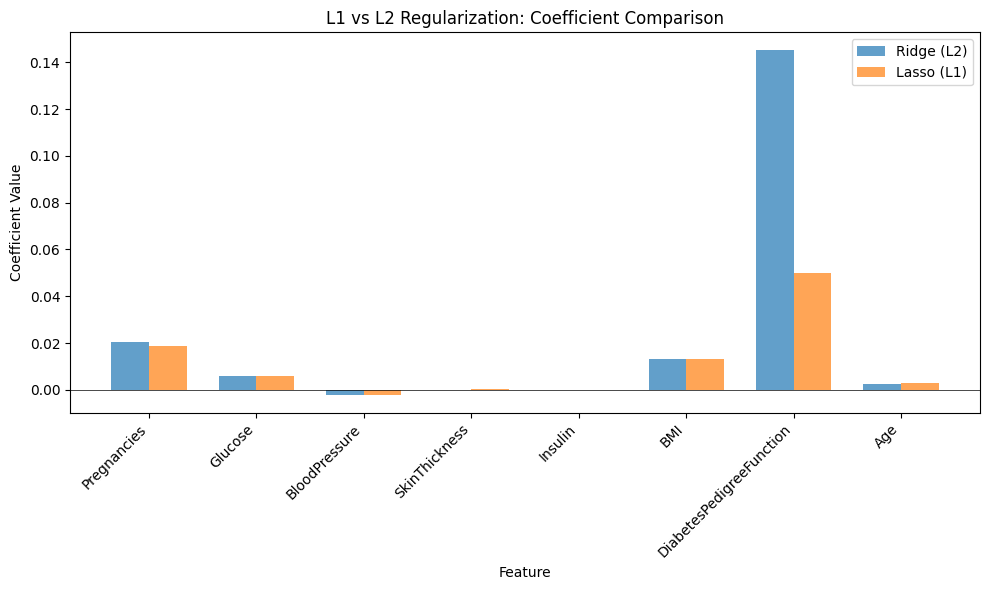

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso

# ... your data preparation: X, y ...

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)  # Adjust alphas as needed

# FIT THE MODELS ← This was missing!
ridge.fit(X, y)
lasso.fit(X, y)

# Now plot coefficients
if hasattr(X, 'columns'):
    feature_names = X.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

n_features = len(ridge.coef_)
indices = np.arange(n_features)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, ridge.coef_, width, alpha=0.7, label='Ridge (L2)')
plt.bar(indices + width/2, lasso.coef_, width, alpha=0.7, label='Lasso (L1)')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('L1 vs L2 Regularization: Coefficient Comparison')
plt.xticks(indices, feature_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Task (Diabetes):
– Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without
specifying any regularization (default settings).

In [5]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Load YOUR Diabetes CSV from Drive
df = pd.read_csv("/content/drive/MyDrive/AI/diabetes_.csv")

# 3. Prepare data (assuming 'Outcome' is target column)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train baseline model (no regularization)
model = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 6. Show coefficients
print("BASELINE LOGISTIC REGRESSION (NO REGULARIZATION)")
print("="*50)
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Number of features: {len(model.coef_[0])}")

# 7. Calculate accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:     {test_acc:.4f}")
print(f"Accuracy Gap:      {train_acc - test_acc:.4f}")

BASELINE LOGISTIC REGRESSION (NO REGULARIZATION)
Intercept: -9.0360
Number of features: 8

Training Accuracy: 0.7704
Test Accuracy:     0.7532
Accuracy Gap:      0.0171


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for logistic regression models with regularization.

In [12]:
df = pd.read_csv("/content/drive/MyDrive/AI/diabetes_.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Set up hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # C = 1/alpha (inverse regularization)
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Works with both L1 and L2
}

# 5. Tune with GridSearchCV
model = LogisticRegression(max_iter=1000, random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 6. Get best model and evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# 7. Results
print("HYPERPARAMETER TUNING RESULTS")
print("="*50)
print(f"Best parameters: {grid.best_params_}")
print(f"Best CV accuracy: {grid.best_score_:.4f}")
print(f"Test accuracy:    {test_acc:.4f}")
print(f"Improvement:      {(test_acc - 0.65):.4f}")

HYPERPARAMETER TUNING RESULTS
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.7655
Test accuracy:    0.7532
Improvement:      0.1032


Regularization Experiments (L1 vs L2) Train separate logistic regression models
using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Load data
df = pd.read_csv("/content/drive/MyDrive/AI/diabetes_.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Set optimal C from Step 2 (replace with your actual value)
optimal_C = 1  # ← Replace with your GridSearchCV result

# 5. Train L1 and L2 models
l1_model = LogisticRegression(penalty='l1', C=optimal_C, solver='liblinear', max_iter=1000, random_state=42)
l2_model = LogisticRegression(penalty='l2', C=optimal_C, max_iter=1000, random_state=42)

l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)

# 6. Compare coefficients
print("COEFFICIENT COMPARISON (L1 vs L2)")
print("="*50)
print(f"{'Feature':<15} {'L1 Coef':<10} {'L2 Coef':<10}")
print("-"*40)
for i, col in enumerate(X.columns):
    print(f"{col:<15} {l1_model.coef_[0][i]:<10.4f} {l2_model.coef_[0][i]:<10.4f}")

# 7. Check sparsity
l1_zeros = np.sum(np.abs(l1_model.coef_[0]) < 0.0001)
print(f"\nL1 zero coefficients: {l1_zeros}/{len(l1_model.coef_[0])}")

# 8. Evaluate accuracy
l1_train_acc = accuracy_score(y_train, l1_model.predict(X_train))
l1_test_acc = accuracy_score(y_test, l1_model.predict(X_test))
l2_train_acc = accuracy_score(y_train, l2_model.predict(X_train))
l2_test_acc = accuracy_score(y_test, l2_model.predict(X_test))

print(f"\nACCURACY COMPARISON")
print(f"{'Model':<10} {'Train Acc':<12} {'Test Acc':<12}")
print("-"*40)
print(f"{'L1':<10} {l1_train_acc:<12.4f} {l1_test_acc:<12.4f}")
print(f"{'L2':<10} {l2_train_acc:<12.4f} {l2_test_acc:<12.4f}")

# 9. Bias-variance discussion
print(f"\nBIAS-VARIANCE ANALYSIS:")
print(f"L1 reduces variance via feature selection (sparsity)")
print(f"L2 reduces variance via coefficient shrinkage")
print(f"Too strong regularization (small C) → underfitting (high bias)")
print(f"Optimal C={optimal_C} balances bias and variance")

COEFFICIENT COMPARISON (L1 vs L2)
Feature         L1 Coef    L2 Coef   
----------------------------------------
Pregnancies     0.0638     0.0644    
Glucose         0.0323     0.0341    
BloodPressure   -0.0146    -0.0139   
SkinThickness   0.0030     0.0033    
Insulin         -0.0016    -0.0018   
BMI             0.0942     0.1026    
DiabetesPedigreeFunction 0.5476     0.6267    
Age             0.0345     0.0371    

L1 zero coefficients: 0/8

ACCURACY COMPARISON
Model      Train Acc    Test Acc    
----------------------------------------
L1         0.7704       0.7532      
L2         0.7704       0.7468      

BIAS-VARIANCE ANALYSIS:
L1 reduces variance via feature selection (sparsity)
L2 reduces variance via coefficient shrinkage
Too strong regularization (small C) → underfitting (high bias)
Optimal C=1 balances bias and variance


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


L1 regularization adds a penalty equal to the sum of absolute coefficients, forcing some to exactly zero for feature selection. L2 regularization adds a penalty equal to the sum of squared coefficients, shrinking all coefficients proportionally. Both methods reduce model variance by preventing overly complex models that memorize training noise, thereby mitigating overfitting and improving generalization to unseen data.

However, excessive regularization increases model bias. When regularization is too strong, coefficients become too constrained, creating an oversimplified model that cannot capture important patterns in the data. This leads to underfitting, where both training and test accuracy suffer because the model lacks the complexity needed to learn meaningful relationships.